## CIS 9: Final Project
### Shweta Surendar 
3/27/23

### Introduction

This project aims to use the features of different prosecuted cases in order to train a classification model that will be able to determine whether a case will be convicted or dismissed. This dataset includes catgorical data on all cases presented to the San Francisco District Attorney’s Office in which the office has taken action to prosecute a case. The goal of this project would be to use the features, or possibly a subset of them, and find their correlation with the status of the case in order to construct a model that can predict whether the case will be convicted or dismissed.


As a Pre-Trial Attorney on my school’s mock trial team, having data on which cases have been successfully convicted and knowing the likelihood of a case being prosecuted is very useful information. This would cut out the busy work in a lawyer’s research process, allowing them to be much more efficient and focus on the most important part of their work: constructing their argument. The scope of this project would be for any case prosecuted in San Francisco as all the data was collected from there. 



### Background

All the input data for this project can be found <a href=" https://www.kaggle.com/datasets/vivovinco/district-attorney-cases-prosecuted">here</a>. This dataset has 79,289 rows and 10 features. 



Imported modules below

In [136]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import sklearn.linear_model as lm

1. __Read data from the source file into a DataFrame__

In [137]:
data = pd.read_csv("District_Attorney_Cases_Prosecuted.csv", encoding='ISO-8859-1')
data.head()

,incident_number,court_number,arrest_date,list_of_filed_charges,filed_case_type,crime_type,dv_case,da_action_taken,case_status,data_as_of,data_loaded_at
0,Z20110822-02461723,2461723,2014/01/03,"550A1/F/0, 550B1/F/0, 550B3/F/0, 550B2/F/0, 66...",MTR,Theft,No,New charges filed,Filed Motion to Revoke,2023/02/07,02/10/2023 10:00:48 PM
1,110861944,2463448,2014/01/07,484A4905/M/0,MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke,2023/02/07,02/10/2023 10:00:48 PM
2,120005308,2464591,2014/01/23,"647E/M/0, 22A/I/0, 372/M/0",MTR,Disorderly Conduct,No,New charges filed,Filed Motion to Revoke,2023/02/07,02/10/2023 10:00:48 PM
3,130512519,2474189,2014/01/03,"TFWT/I/0, 242/M/0, TFWT/I/0",MTR,Assault and Battery,No,New charges filed,Filed Motion to Revoke,2023/02/07,02/10/2023 10:00:48 PM
4,130806469,2476224,2014/01/13,"459/M/2, 666A/M/0",MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke,2023/02/07,02/10/2023 10:00:48 PM


2. __Dropped irrelevant data__<br>
The columns 'incident_number', 'court_number', 'arrest_date', 'data_as_of', 'data_loaded_at', and 'list_of_filed_charges' do not affect the content of the case which is what this investigation is focused on.

In [138]:
data = data.drop(columns=['incident_number', 'court_number','arrest_date','data_as_of','data_loaded_at', 'list_of_filed_charges'])
data.head()

,filed_case_type,crime_type,dv_case,da_action_taken,case_status
0,MTR,Theft,No,New charges filed,Filed Motion to Revoke
1,MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke
2,MTR,Disorderly Conduct,No,New charges filed,Filed Motion to Revoke
3,MTR,Assault and Battery,No,New charges filed,Filed Motion to Revoke
4,MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke


3. __Checked for any NaN's that may be left__<br>
I removed the rows that still had NaN's.

In [139]:
#These are the NaN values still in our data
nanCount = data.isna().sum()
print("NaN Count in each column:")
print(nanCount)

NaN Count in each column:
filed_case_type     728
crime_type         1407
dv_case               0
da_action_taken     218
case_status        3551
dtype: int64


In [140]:
data = data.dropna()
nanCount = data.isna().sum()
print("NaN Count in each column:")
print(nanCount)
data.head()

NaN Count in each column:
filed_case_type    0
crime_type         0
dv_case            0
da_action_taken    0
case_status        0
dtype: int64


,filed_case_type,crime_type,dv_case,da_action_taken,case_status
0,MTR,Theft,No,New charges filed,Filed Motion to Revoke
1,MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke
2,MTR,Disorderly Conduct,No,New charges filed,Filed Motion to Revoke
3,MTR,Assault and Battery,No,New charges filed,Filed Motion to Revoke
4,MTR,Petty Theft,No,New charges filed,Filed Motion to Revoke


4. __Only kept rows that had a case status of 'Convicted' or 'Dismissed'__

In [141]:
datacd = data.loc[data['case_status'].isin(["Conviction",'Dismissal'])]
datacd.head()

,filed_case_type,crime_type,dv_case,da_action_taken,case_status
11070,Felony,Willful Homicide,No,New charges filed,Conviction
11071,Felony,Willful Homicide,No,New charges filed,Conviction
11072,Felony,Willful Homicide,No,New charges filed,Conviction
11073,Felony,Willful Homicide,No,New charges filed,Conviction
11074,Felony,Willful Homicide,No,New charges filed,Conviction


5. __Remove the 'da_action_taken' column__<br>
After we reduced our dataframe to only include case status that were convictions or dismissals, all of the values in the 'da_action_taken' column are 'New charged filed', so we know it is not going to have an impact on whether a case is convicted or dismissed. The code below will remove that column.

In [142]:
display(datacd['da_action_taken'].value_counts())
datacd = datacd.drop(columns=['da_action_taken'])
display(datacd.head())

New charges filed    47020
Name: da_action_taken, dtype: int64

,filed_case_type,crime_type,dv_case,case_status
11070,Felony,Willful Homicide,No,Conviction
11071,Felony,Willful Homicide,No,Conviction
11072,Felony,Willful Homicide,No,Conviction
11073,Felony,Willful Homicide,No,Conviction
11074,Felony,Willful Homicide,No,Conviction


6. __Change the _crime_type_ to the 'int' data type__<br>The code below gives every unique crime type a value from 1-40

In [143]:
keyList = datacd['crime_type'].unique()
myDict = {key: None for key in keyList}
keyIndex = 1
for key in myDict:
    myDict[key] = keyIndex
    keyIndex = keyIndex + 1
datacd = datacd.replace(myDict)
datacd = datacd.astype({'crime_type': 'int'}) 
dict_crime = myDict
datacd

,filed_case_type,crime_type,dv_case,case_status
11070,Felony,1,No,Conviction
11071,Felony,1,No,Conviction
11072,Felony,1,No,Conviction
11073,Felony,1,No,Conviction
11074,Felony,1,No,Conviction
...,...,...,...,...
94475,Felony,40,No,Dismissal
94476,Felony,40,No,Dismissal
94494,Felony,40,No,Dismissal
94495,Felony,40,No,Dismissal


### Analysis
This code plots a seaborn scatterplot of the crime type versus the case status. This code is what I researched that was beyond what was covered in this class. I learned how to modify the traditional seaborn scatterplot to find the needs of this specific problem. Making the seaborn scatterplot a 'violin' plot helped show which type of case had the most convictions and which had the most dismissals. A wider portion in the graph indicates more convictions or dismissals, somthing that wouldn't be too clear in a regular scatterplot. From the graph we can see, for example, that Case 13, 'Driving Under Influence Cases', had a much greater number of convictions and Case 40, 'Other Sex Law Violations', had very few convictions in comparison to the dismissals. 

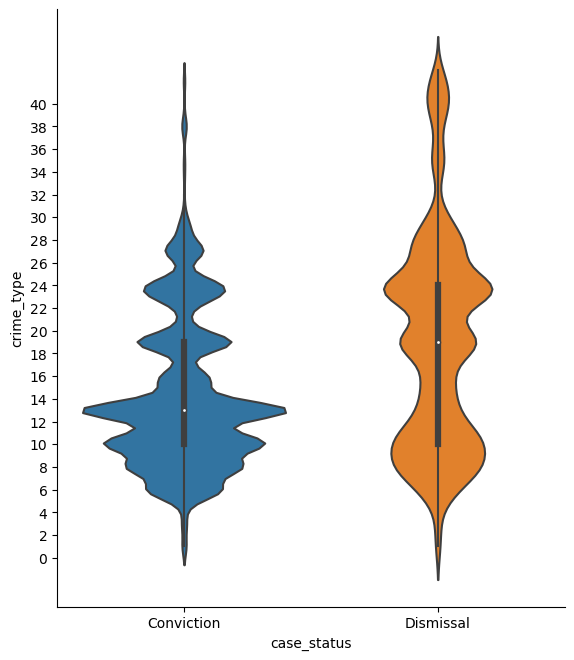

In [155]:
sns.catplot(data=datacd, x='case_status', y='crime_type', kind="violin")
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
fig = plt.gcf()
fig.set_size_inches(6,7)
plt.show()

__Change the _filed_case_type_, _dv_case_, and _case_status_ to the 'int' data type__

In [156]:
dict_status = {'Conviction': 0, 'Dismissal': 1}
datacd.replace(dict_status, inplace=True)
datacd = datacd.astype({'case_status': 'int'}) 
dict_dv = {'Yes': 0, 'No': 1}
datacd.replace(dict_dv, inplace=True)
datacd = datacd.astype({'dv_case': 'int'}) 

In [157]:
keyList = datacd['filed_case_type'].unique()
myDict = {key: None for key in keyList}
keyIndex = 1
for key in myDict:
    myDict[key] = keyIndex
    keyIndex = keyIndex + 1
dict_type = myDict
datacd = datacd.replace(myDict)
datacd = datacd.astype({'filed_case_type': 'int'}) 
datacd.head()

,filed_case_type,crime_type,dv_case,case_status
11070,1,1,1,0
11071,1,1,1,0
11072,1,1,1,0
11073,1,1,1,0
11074,1,1,1,0


Map of all replaced values for easy reference.

In [158]:
print('CRIME TYPE MAP')
print(dict_crime, '\n')
print('CASE STATUS MAP')
print(dict_status, '\n')
print('DV CASE MAP ')
print(dict_dv, '\n')
print('FILED CASE TYPE MAP')
print(dict_type, '\n')

CRIME TYPE MAP
{'Willful Homicide': 1, 'Manslaughter - Non Vehicular': 2, 'Forcible Rape': 3, 'Lewd or Lascivious': 4, 'Kidnapping': 5, 'Robbery': 6, 'Manslaughter - Vehicular': 7, 'Assault': 8, 'Willful Homicide (Att.)': 9, 'Burglary': 10, 'Weapons': 11, 'Arson': 12, 'DUI': 13, 'Hit-and-Run': 14, 'Motor Vehicle Theft': 15, 'Theft': 16, 'Forgery, Checks, Access Cards': 17, 'Escape': 18, 'Narcotics': 19, 'Unlawful Sexual Intercourse': 20, 'Other Sex Law Violations': 21, 'Bookmaking': 22, 'Other': 23, 'Assault and Battery': 24, 'Indecent Exposure': 25, 'Annoy/Molest Children': 26, 'Petty Theft': 27, 'Other Theft': 28, 'Vandalism': 29, 'Trespassing': 30, 'Lewd Conduct': 31, 'Contributing Delinquency of Minor': 32, 'Malicious Mischief': 33, 'Disturbing Peace': 34, 'Disorderly Conduct': 35, 'Prostitution': 36, 'Gambling': 37, 'Selected Traffic': 38, 'Liquor Laws': 39, 'Local SF Ordinance': 40, 'Faiulre to Appear/Non-Traffic': 41, 'Marijauana': 42, 'Enhancements': 43} 

CASE STATUS MAP
{'Con

Verify that all data types are now int:

In [159]:
datacd.dtypes

filed_case_type    int32
crime_type         int32
dv_case            int32
case_status        int32
dtype: object

The code below plots the remaining features on scatterplots with respect to the case status and adds a linear regression line to determine the correlation. However, from looking at the graphs, it is not very easy to tell whether there is any correlation between the values.  

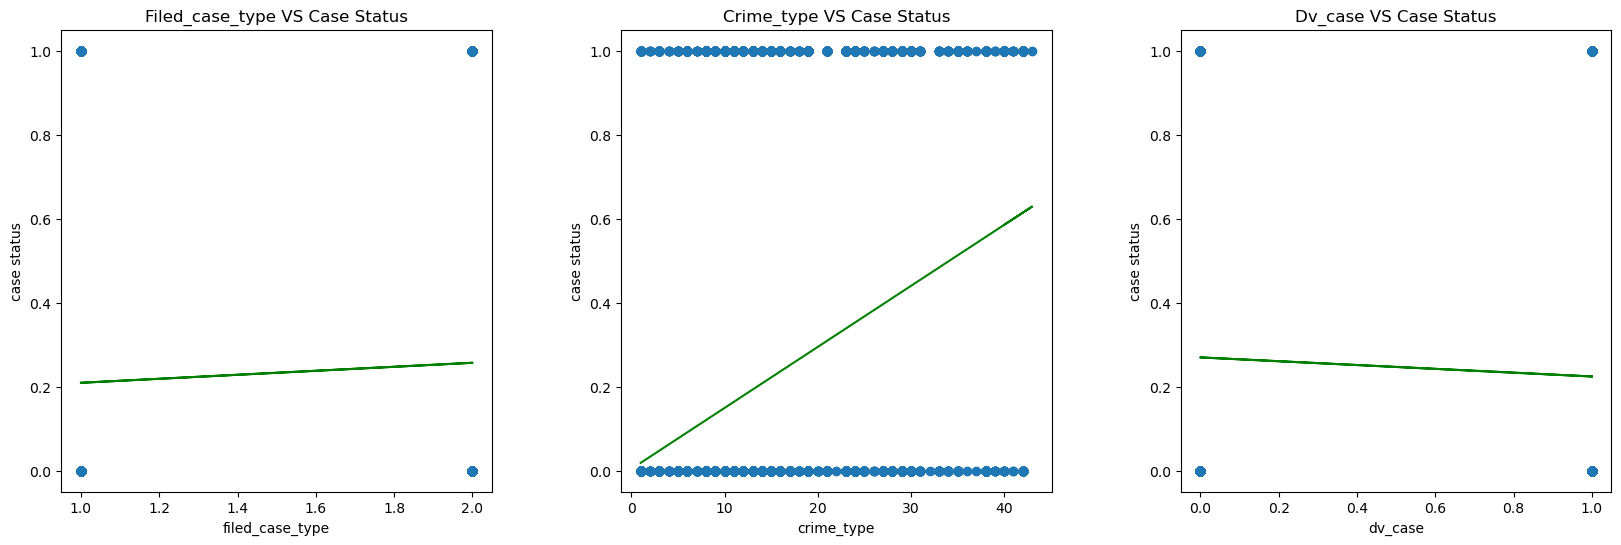

In [97]:
subplotCount = 1
for column in datacd.drop(columns=['case_status']).columns:
    plt.subplot(1,3, subplotCount)
    plt.scatter(datacd[column], datacd.case_status)
    plt.title(str("" + str(column).capitalize() + " VS Case Status"))
    plt.xlabel(column)
    plt.ylabel('case status')
    subplotCount = subplotCount + 1
    
    regr = lm.LinearRegression()
    all_columns = ['filed_case_type', 'crime_type', 'dv_case', 'case_status']
    all_columns.remove(str(column))
    X = datacd.drop(columns = all_columns)
    y = datacd.case_status
    regr = regr.fit(X,y)
    plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.rcParams['figure.figsize'] = [20, 6]
plt.subplots_adjust(wspace=0.3)
plt.show()

This code below plots a seaborn heatmap which gives the correlation values of the different features with respect to one another. This graph is much easier to read and determine correlation. The values in the table are the correlation coefficient . A correlation coefficient close to 1 or -1 indicates high correlation but a correlation coeffiecient closer to zero indicates very low correlation. All the correlation coefficients in the table are close to zero indicating that there is low correlation between the features. 

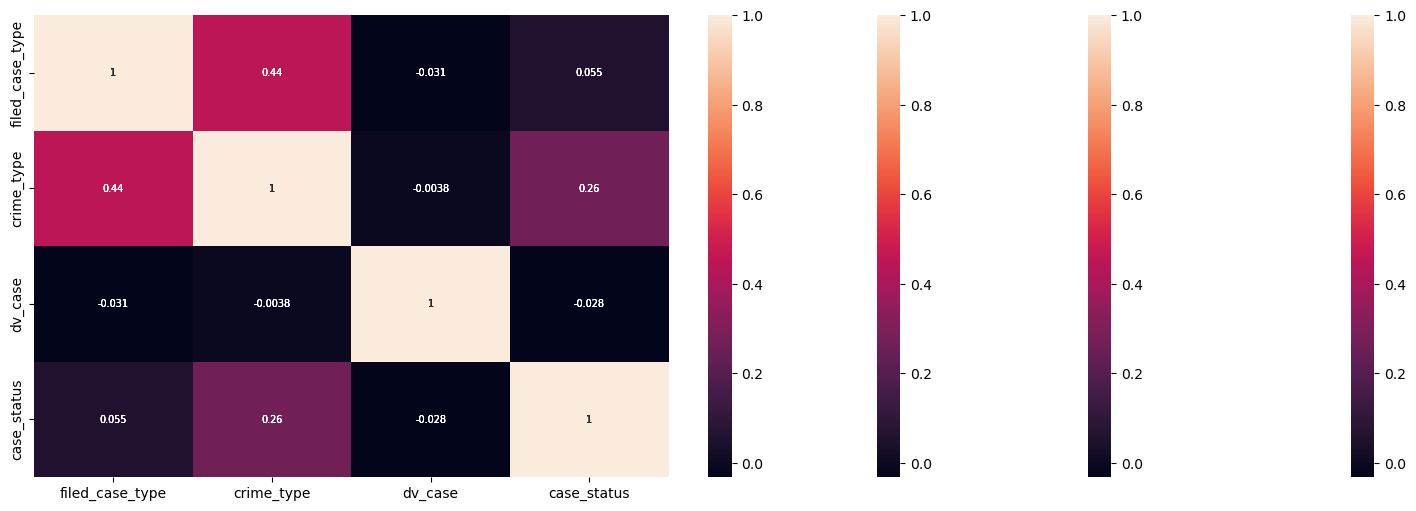

In [101]:
sns.heatmap(datacd.corr(), annot=True, annot_kws={"size": 7})
plt.show()

__Created the X and y datasets__, given that we want to predict the the case status.

In [160]:
y=datacd.case_status
X=datacd.drop(columns=['case_status'])

display(y.head(5))
display(X.head(5))

11070    0
11071    0
11072    0
11073    0
11074    0
Name: case_status, dtype: int32

,filed_case_type,crime_type,dv_case
11070,1,1,1
11071,1,1,1
11072,1,1,1
11073,1,1,1
11074,1,1,1


__Created the training and testing X and y datasets.__<br>
Then printed the shape of each set.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35265, 3) (11755, 3) (35265,) (11755,)


__Determined the best classification model to use by comparing the accuracy__

In [163]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
    ]

In [164]:
classifier_results=[]
for classifier in classifiers:
    # train the classifier
    classifier.fit(X_train, y_train)  
    # test the trained classifier
    y_output = classifier.predict(X_test)
    # compare the predicted output with the actual output
    print(classifier)
    score = f1_score(y_test, y_output, average='weighted')
    mean_accuracy_score = round(classifier.score(X,y),3)
    accuracy_score = round(metrics.accuracy_score(y_test, y_output), 3)
    print(f" f1_score: {score:.3f}\n mean accuracy score: {mean_accuracy_score}\n accuracy_score: {accuracy_score}")
    
    classifier_results.append({'classifier_model': str(classifier), 'f1_score': score, 'mean_accuracy_score': mean_accuracy_score, 'accuracy_score': accuracy_score})

C:\Users\shwet\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier()


C:\Users\shwet\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 f1_score: 0.722
 mean accuracy score: 0.764
 accuracy_score: 0.763
DecisionTreeClassifier()
 f1_score: 0.737
 mean accuracy score: 0.791
 accuracy_score: 0.791
RandomForestClassifier()
 f1_score: 0.737
 mean accuracy score: 0.791
 accuracy_score: 0.791
GaussianNB()
 f1_score: 0.734
 mean accuracy score: 0.774
 accuracy_score: 0.774


I sorted all the classfiers above by comparing their f1 score, their mean accuracy score, and their accuracy score. I found that overall, the DesicionTreeClassifier was the most accurate of the models that I tested, so I proceeded with it.

In [166]:
results = pd.DataFrame(classifier_results)
display(results.sort_values(by='f1_score', ascending=False))
display(results.sort_values(by='mean_accuracy_score', ascending=False))
display(results.sort_values(by='accuracy_score', ascending=False))

,classifier_model,f1_score,mean_accuracy_score,accuracy_score
1,DecisionTreeClassifier(),0.736859,0.791,0.791
2,RandomForestClassifier(),0.736798,0.791,0.791
3,GaussianNB(),0.734276,0.774,0.774
0,KNeighborsClassifier(),0.722078,0.764,0.763


,classifier_model,f1_score,mean_accuracy_score,accuracy_score
1,DecisionTreeClassifier(),0.736859,0.791,0.791
2,RandomForestClassifier(),0.736798,0.791,0.791
3,GaussianNB(),0.734276,0.774,0.774
0,KNeighborsClassifier(),0.722078,0.764,0.763


,classifier_model,f1_score,mean_accuracy_score,accuracy_score
1,DecisionTreeClassifier(),0.736859,0.791,0.791
2,RandomForestClassifier(),0.736798,0.791,0.791
3,GaussianNB(),0.734276,0.774,0.774
0,KNeighborsClassifier(),0.722078,0.764,0.763


This code initializes, fits, and tests the DesicionTreeClassifier

In [175]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)  
#test the trained classifier
y_output = classifier.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_output})
df

,Actual,Predicted
46781,0,0
79865,0,0
54278,0,0
12330,0,0
75718,0,0
...,...,...
19953,0,0
24876,0,0
70018,1,0
34366,0,0


This code prints the accuracy of the DesicionTreeClassifier. It is the most accurate of all of the classifiers we have gove over in this course. 

In [173]:
print(classifier_results[1])

{'classifier_model': 'DecisionTreeClassifier()', 'f1_score': 0.7368593764092597, 'mean_accuracy_score': 0.791, 'accuracy_score': 0.791}


This code uses the DecisionTreeClassifier with my own inputs to test if that given case would be convicted or dismissed. Then once the model returns a zero or one, I use the dict_status I created earlier to correctly return 'Convicted' or 'Dismissed' by passing finding it in the list of keys. 

In [184]:
print("Felony, Driving Under Influence, No Domestic Violence:\t\t",list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[1, 13, 1]]))]) #Felony, Driving Under Influence, No Domestic Violence
print("Misdemeanor, Driving Under Influence, Domestic Violence:\t",list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[2, 13, 0]]))]) #Misdemeanor, Driving Under Influence, Domestic Violence
print('Felony, Driving Under Influence, Domestic Violence:\t\t',list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[1, 13, 0]]))]) #Felony, Driving Under Influence, Domestic Violence
print('Misdemeanor, Other Sex Law Violations, No Domestic Violence:\t',list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[2, 40, 1]]))]) #Misdemeanor, Other Sex Law Violations, No Domestic Violence
print('Felony,Other Sex Law Violations, No Domestic Violence:\t\t',list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[1, 40, 1]]))]) #Felony,Other Sex Law Violations, No Domestic Violence
print('Misdemeanor, Other Sex Law Violations, No Domestic Violence:\t',list(dict_status.keys())[list(dict_status.values()).index(classifier.predict([[2, 40, 0]]))]) #Misdemeanor, Other Sex Law Violations, No Domestic Violence

Felony, Driving Under Influence, No Domestic Violence:		 Conviction
Misdemeanor, Driving Under Influence, Domestic Violence:	 Conviction
Felony, Driving Under Influence, Domestic Violence:		 Conviction
Misdemeanor, Other Sex Law Violations, No Domestic Violence:	 Dismissal
Felony,Other Sex Law Violations, No Domestic Violence:		 Dismissal
Misdemeanor, Other Sex Law Violations, No Domestic Violence:	 Dismissal


C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shwet\anaconda\lib\site-packages\sklearn\base.py:450: Us

### Conclusion

From the heatmap, we can see that there is faily weak correlation between the different features and the status of a case. The graph of the features versus the case status confirms that there isn't a clear correlation between the 3 feature, filed_case_type, crime_type, dv_case and the status of the case. However, from the seaborn violin scatterplot, we can see that there are definetely certain types of cases that are convicted more than other types of cases, for example Case 13. There are also other cases that are dismissed much more often than convicted, such as Case 40. Additionally, when testing my DecisionTreeClassifier with my own input above I found that no matter if I changed the other two features, Case 13 returned 'Convicted' all 3 times. Similarly, no matter if I changed the features for Case 40, it still returned 'Dismissed' all three times. This leads me to believe that there is another counfounding variable leading to this unexplained difference. In order to expand on this research, more relevant data of possible features should be collected which will get us closer to finding the confounding variable. When I cut down this intital dataset to its most relevant parts, I found there were only 3 features to use which may have skewed the result due to undercoverage. 